In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.applications import vgg19
import os

In [2]:
img_list = os.listdir("Animals Images/")
images = []
for file in img_list:
    file = 'Animals Images/' + file
    images.append(file)
print(images)

['Animals Images/animal-1.jpg', 'Animals Images/animal-2.jpg', 'Animals Images/animal-3.jpg', 'Animals Images/animal-4.jpg', 'Animals Images/animal-5.jpg', 'Animals Images/animal-6.jpg', 'Animals Images/animal-7.jpeg', 'Animals Images/animal-8.jpg', 'Animals Images/animal-9.jpg']


In [3]:
model = vgg19.VGG19()

1/1 [==============================] - 0s 131ms/step


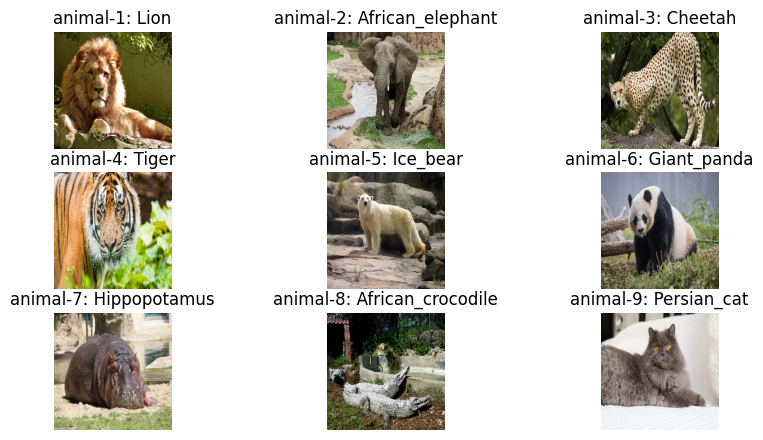

In [4]:
fig = plt.figure(figsize=(10,7))
rows = 4
columns = 3
i=0

for file in images:
    i+=1
    
    img = image.load_img(file, target_size=(224,224))
    label = file.split("/")[1].split(".")[0]
    input_img = image.img_to_array(img)
    input_img = np.expand_dims(input_img, axis=0)
    input_img = vgg19.preprocess_input(input_img)

    predict_img = model.predict(input_img)
    final_predict = vgg19.decode_predictions(predict_img, top=1)

    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{label}: {final_predict[0][0][1].capitalize()}")